# Creación de docx usando Python

## Docx

DOCX es un formato de archivo utilizado por el software de procesamiento de texto Microsoft Word a partir de la versión 2007. DOCX es una abreviatura de "Document Open XML", lo que significa que utiliza un lenguaje de marcado XML para representar documentos de texto.

El formato DOCX es una mejora respecto al formato anterior de Microsoft Word, que utilizaba la extensión de archivo .doc. Al utilizar XML, el formato DOCX permite que los documentos sean más compatibles con otros programas y sistemas operativos, y también permite que los archivos sean más pequeños y fáciles de manipular.

Los archivos DOCX pueden contener texto, imágenes, tablas, gráficos y otros elementos de formato avanzado. Además, también pueden incluir macros y otros programas integrados en el archivo.

## Python-docx

Python-docx es una biblioteca de Python que permite trabajar con archivos de formato DOCX de Microsoft Word. La biblioteca se utiliza para crear, modificar y leer documentos de Word a través de la programación en Python.

Con Python-docx, los usuarios pueden crear y modificar documentos de Word, agregando o eliminando texto, tablas, imágenes, gráficos y otros elementos. También es posible aplicar formatos a los elementos del documento, como fuentes, tamaños de fuente, estilos y colores.

### Instalación 

Para utilizar Python-docx, necesitaremos su biblioteca llamada Python-docx. Para instalarla podemos ejecutar esta línea

`$ pip install python-docx`

Si aparece un error, podríamos ejecutar

`$ pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org python-docx`

o bien:

`$ pip install --user --trusted-host pypi.org --trusted-host files.pythonhosted.org python-docx`

Comprobamos:

In [14]:
from docx import Document
import docx

document = Document()

document.add_heading('Título', 0)

document.save('ejemplo.docx')

### Párrafos

Un párrafo es uno de los elementos más simples que puedes agregar a un documento de Word. Puedes agregar un párrafo utilizando el método add_paragraph:

In [4]:
p = document.add_paragraph('Este es un párrafo de texto.')

Una vez que has agregado un párrafo, puedes cambiar su estilo y formato. Por ejemplo, puedes cambiar el tamaño de fuente y el estilo utilizando el atributo style:

In [16]:
p.style = 'Title'
p.add_run().font.size = docx.shared.Pt(16)


También puedes agregar texto a un párrafo que ya existe:

In [17]:
p.add_run('Este es otro texto dentro del mismo párrafo.')

### Encabezados

Los encabezados son otra forma común de agregar contenido a un documento de Word. 

El argumento level especifica el nivel del encabezado (1 para el nivel superior, 2 para el segundo nivel, y así sucesivamente).

Puedes agregar un encabezado utilizando el método add_heading:


In [18]:
document.add_heading('Este es un encabezado', level=1)

### Tablas

Las tablas son una forma común de agregar contenido estructurado a un documento de Word. Puedes agregar una tabla utilizando el método add_table:

In [19]:
table = document.add_table(rows=3, cols=3)
for i in range(3):
    row = table.rows[i]
    for j in range(3):
        row.cells[j].text = f'Fila {i}, Columna {j}'

También puedes dar formato a una tabla cambiando su estilo:

In [ ]:
table.style = 'Table Grid'

### Imágenes

Por último, puedes agregar imágenes a un documento de Word utilizando el método add_picture.

Este ejemplo agrega una imagen llamada mi_imagen.png con una anchura de 10 centímetros y una altura de 10 centímetros:

In [21]:
document.add_picture("resources/business-logo.jpg", width=docx.shared.Cm(10), height=docx.shared.Cm(10))

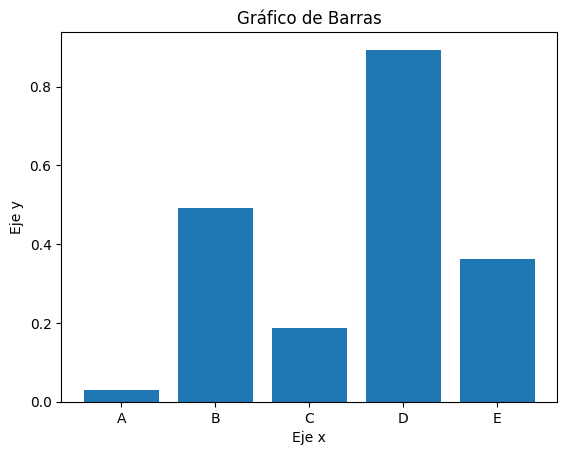

In [33]:
import docx
import numpy as np
import matplotlib.pyplot as plt

# Crear el documento
document = docx.Document()

# Agregar un encabezado de nivel 1 con un título
document.add_heading('Título del Documento', level=0)

# Agregar un párrafo
document.add_paragraph('Este es un párrafo de texto.')

# Agregar una tabla con datos de ejemplo
table = document.add_table(rows=4, cols=5)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Encabezado 1'
hdr_cells[1].text = 'Encabezado 2'
hdr_cells[2].text = 'Encabezado 3'
hdr_cells[3].text = 'Encabezado 4'
hdr_cells[4].text = 'Encabezado 5'
for i in range(1, 4):
    row_cells = table.rows[i].cells
    row_cells[0].text = f'Dato {i}, Columna 1'
    row_cells[1].text = f'Dato {i}, Columna 2'
    row_cells[2].text = f'Dato {i}, Columna 3'
    row_cells[3].text = f'Dato {i}, Columna 4'
    row_cells[4].text = f'Dato {i}, Columna 5'

# Agregar un encabezado de nivel 2 con un título
document.add_heading('Gráfico de Líneas', level=2)

# Generar un gráfico de líneas de una gaussiana
x = np.linspace(-5, 5, 1000)
y = np.exp(-(x**2)/2)/np.sqrt(2*np.pi)
plt.plot(x, y)
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Gráfico de una Gaussiana')
plt.savefig('grafico_lineas.png')

# Agregar la imagen del gráfico de líneas al documento
document.add_picture('grafico_lineas.png')

# Agregar otro encabezado de nivel 2 con un título
document.add_heading('Gráfico de Barras', level=2)

# Generar un gráfico de barras de datos aleatorios
x = ['A', 'B', 'C', 'D', 'E']
y = np.random.rand(5)
plt.clf()
plt.bar(x, y)
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Gráfico de Barras')
plt.savefig('grafico_barras.png')

# Agregar la imagen del gráfico de barras al documento
document.add_picture('grafico_barras.png')

# Guardar el documento
document.save('mi_documento.docx')

### Leer ficheros

In [17]:
import docx

documento = docx.Document('resources/factura-ordinaria.docx') 

tabla = documento.tables[0]

datos_cliente = {
    'Nombre': 'Alejandro Rodriguez Rodriguez',
    'Dirección': 'Av. de la Soledad SN, Toledo',
    'NIF': '654332164N',
    'Código postal': '33365',
    'Teléfono': '998556331',
    'INVOICE': 'ACCHAU-6564'
}

datos_factura = {
    'Productos':[{
        'Descripción': '245512455N-36478',
        'Unidades': 25,
        'Precio unitario':100.00,
        'Total':2500.00
    },{
        'Descripción': '412564415N-36478',
        'Unidades': 30,
        'Precio unitario':200.00,
        'Total':6000.00
    },{
        'Descripción': '245512455N-36478',
        'Unidades': 1,
        'Precio unitario':1899.99,
        'Total':1899.99
    }],
    'Total':[{
        'Subtotal': 10399.99 ,
        'Descuento': '0 %',
        'IVA%': '21 %',
        'IVA': 2183.99,
        'Total': 12583.99
    }]
}

for i, (clave, valor) in enumerate(datos_cliente.items()):
    tabla.rows[9+i].cells[0].text += valor

# Fechas
tabla.rows[17].cells[0].text += '06/03/2023'
tabla.rows[19].cells[0].text += '06/03/2024'

# Productos:
for i,producto in enumerate(datos_factura['Productos']):
    tabla.rows[16+i].cells[2].text += producto['Descripción']
    tabla.rows[16+i].cells[3].text += str(producto['Unidades'])
    tabla.rows[16+i].cells[4].text += str(producto['Precio unitario'])
    tabla.rows[16+i].cells[6].text += str(producto['Total'])

# TOTAL:
valor = datos_factura['Total'][0]
tabla.rows[24].cells[6].text += str(valor['Subtotal'])
tabla.rows[25].cells[6].text += str(valor['Descuento'])
tabla.rows[26].cells[6].text += str(valor['IVA%'])
tabla.rows[27].cells[6].text += str(valor['IVA'])
tabla.rows[29].cells[6].text += str(valor['Total'])


documento.save('factura.docx')

Un último paso podría ser convertirlo a pdf, para que se pueda imprimir, para esto usamos libreoffice en modo headless



In [18]:
import subprocess

loffice = 'C:/Program Files/LibreOffice/program/soffice.exe'

subprocess.run('"{}" --convert-to pdf --outdir "{}" "{}"'.format(loffice,'.', 'factura.docx',), shell=True)

CompletedProcess(args='"C:/Program Files/LibreOffice/program/soffice.exe" --convert-to pdf --outdir "." "factura.docx"', returncode=0)